In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

[4.34256328 4.34770597]


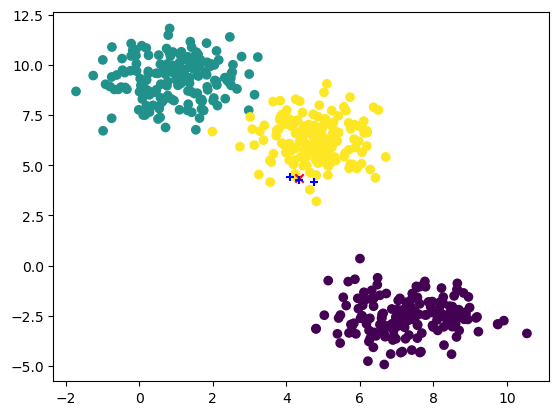

In [71]:
n_samples = 500
seed = 32

blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)

# plot the generated data
X, y = blobs
plt.scatter(X[:, 0], X[:,1], c=y, cmap='viridis')

# Find the global mean
global_mean = np.mean(X, axis=0)
plt.scatter(global_mean[0], global_mean[1], c='red', marker='x')
print(global_mean)

vector_0 = [4.108942, 4.423281]
vector_1 = [4.764484, 4.163327]
vector_2 = [4.345918, 4.279954]

plt.scatter(vector_0[0], vector_0[1], c='blue', marker='+')
plt.scatter(vector_1[0], vector_1[1], c='blue', marker='+')
plt.scatter(vector_2[0], vector_2[1], c='blue', marker='+')


In [24]:
# Save the data as csv
data = np.column_stack((X[:, 0], X[:,1]))
np.savetxt('data.csv', data, delimiter=',')

In [ ]:
gmm = mixture.GaussianMixture(n_components=3, covariance_type='full')

(4.805, 6.284)
(7.291, -2.540)
(0.935, 9.310)
(8.219, -1.117)
(7.005, -2.200)
(1.864, 8.759)
(6.500, 7.755)
(6.723, -3.005)
(0.944, 9.623)
(4.411, 4.168)
(4.349, 4.436)
(4.270, 4.428)


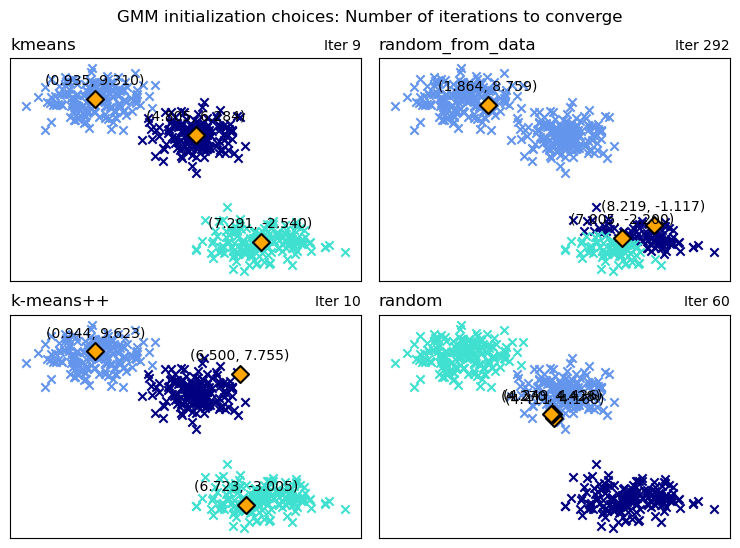

In [42]:
def get_initial_means(X, init_params, r):
    # Run a GaussianMixture with max_iter=0 to output the initialization means
    gmm = mixture.GaussianMixture(
        n_components=3, init_params=init_params, tol=1e-9, max_iter=0, random_state=r
    ).fit(X)
    return gmm.means_


methods = ["kmeans", "random_from_data", "k-means++", "random"]
colors = ["navy", "turquoise", "cornflowerblue", "darkorange"]


plt.figure(figsize=(4 * len(methods) // 2, 6))
plt.subplots_adjust(
    bottom=0.1, top=0.9, hspace=0.15, wspace=0.05, left=0.05, right=0.95
)

for n, method in enumerate(methods):
    r = np.random.RandomState(seed=1234)
    plt.subplot(2, len(methods) // 2, n + 1)

    ini = get_initial_means(X, method, r)


    gmm = mixture.GaussianMixture(
        n_components=3, means_init=ini, tol=1e-9, max_iter=2000, random_state=r
    ).fit(X)

    for i, color in enumerate(colors):
        data = X[gmm.predict(X) == i]
        plt.scatter(data[:, 0], data[:, 1], color=color, marker="x")

    plt.scatter(ini[:, 0], ini[:, 1], s=75, marker="D", c="orange", lw=1.5, edgecolors="black")

    # Annotate each point with its coordinate values
    for i, (x, y) in enumerate(ini):
        plt.annotate(f'({x:.3f}, {y:.3f})', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
        print(f'({x:.3f}, {y:.3f})')

    plt.xticks(())
    plt.yticks(())
    plt.title(method, loc="left", fontsize=12)
    plt.title(
        "Iter %i" % (gmm.n_iter_),
        loc="right",
        fontsize=10,
    )
plt.suptitle("GMM initialization choices: Number of iterations to converge")
plt.show()

In [66]:
# Back-calculating a good threshold for perturbations about the mean vector that was used in the `random` initialization
a = np.array([4.411, 4.168])
b = np.array([4.349, 4.436])
c = np.array([4.270, 4.428])

a_delta = a - global_mean
b_delta = b - global_mean
c_delta = c - global_mean

all_delta = np.concatenate((a_delta, b_delta, c_delta))
print(all_delta)
print(np.min(all_delta))
print(np.max(all_delta))
print(np.average(np.absolute(all_delta)))


[ 0.06843672 -0.17970597  0.00643672  0.08829403 -0.07256328  0.08029403]
-0.17970597064304794
0.08829402935695185
0.08262179202755797


In [75]:
# The mean vector of the generated data
mean_vector = np.mean(X, axis = 0)
print(mean_vector)

# The Covariance Matrix of the generated data
cov_matrix = np.cov(X, rowvar = False)
print(cov_matrix)

[4.34256328 4.34770597]
[[  7.79201355 -12.14281365]
 [-12.14281365  26.34594804]]
